In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch as t


In [2]:
df = pd.read_csv("train.csv")
df["message_timestamp"] = pd.to_datetime(df["message_timestamp"])
df.head()


physical_part_type   message_timestamp   weekday         shift  \
0              type1 2024-09-03 10:01:10   Tuesday  Fruehschicht   
1              type1 2024-09-27 08:13:47    Friday  Fruehschicht   
2              type2 2024-09-17 12:10:42   Tuesday  Fruehschicht   
3              type1 2024-09-05 06:52:53  Thursday  Fruehschicht   
4              type1 2024-09-02 16:11:57    Monday  Spaetschicht   

                                    physical_part_id  \
0  gAAAAABnRuZfvC_FyuY9-rngQaMf1ziNK2zuDa9otZZbO4...   
1  gAAAAABnRuZgeQr6lfTF47aghsyTt5487RhGVvp8A6Z5yF...   
2  gAAAAABnRuZieAGt_mqt4h3QhoMgJau0MrRYu5a3vkqVrc...   
3  gAAAAABnRuZhZDXvC4J8jfroP2dtSoNTb6LwN01HrMuIAL...   
4  gAAAAABnRuZhNgNANyVzaSCrG5aZFqanQ6pewNfUKr1BBh...   

   s6_sensor0_millimeter_step1  s8_sensor0_millimeter_step1  \
0                  4606.469076                    20.936714   
1                  4606.469076                    18.293964   
2                  5886.043819                    20.944510   
3                  4606.469076                    18.475864   
4                  4606.469076                    19.801137   

   s8_sensor1_millimeter_step1  s7_sensor0_newton_step1  \
0                   390.550800              8856.466834   
1                   378.279734              8860.946584   
2                   428.742769              8849.747208   
3                   373.095553              8845.267457   
4                   382.829679              8847.507333   

   s9_sensor0_kilonewton_step1  ...  s0_sensor57_millimeter_step4  \
0                    36.836737  ...                  25845.838372   
1                    36.836737  ...                  25845.838372   
2                    36.836737  ...                           NaN   
3                    36.836737  ...                  25845.838372   
4                    36.836737  ...                  25845.838372   

   s2_sensor23_millimeter_step1  s2_sensor24_millimeter_step1  \
0                           NaN                    211.140672   
1                           NaN                    219.378953   
2                           NaN                    139.958218   
3                           NaN                    230.579313   
4                           NaN                    223.544376   

   s8_sensor120_ml_step1  s7_sensor50_mikrometer_step1  \
0             160.057323                  34330.194148   
1             163.290804                  36345.383742   
2             169.757767                  31595.293985   
3             155.746015                  33106.686181   
4             163.290804                  34905.962604   

   s2_sensor25_millimeter_step1  s8_sensor121_binaer_step1  \
0                    219.619385                        0.0   
1                    223.849971                        0.0   
2                    222.736659                        0.0   
3                    213.978603                        0.0   
4                    224.221075                        0.0   

   s8_sensor122_millimeter_step1  s3_sensor3_newtonmeter_step1  label  
0                     800.934636                     24.494014      0  
1                     730.115844                     24.494014      1  
2                     870.038599                     24.816343      1  
3                     770.286627                     24.217135      1  
4                     799.402235                     22.966675      1  

[5 rows x 376 columns]

In [3]:
for c in df.columns:
    if "sensor" not in c:
        print(f"Column: {c}")
        col = df[c]
        unique = col.unique()
        print(f"Unique: {len(unique)} | NaN: {col.isna().sum()} | Total: {len(col)}")
        try:
            print(f"Min: {col.min()} | Max: {col.max()}")
        except:
            pass
        print(f"Unique values:")
        print(unique[:7])
        print()


Column: physical_part_type
Unique: 4 | NaN: 1 | Total: 40336
Unique values:
['type1' 'type2' 'type4' nan]

Column: message_timestamp
Unique: 40336 | NaN: 0 | Total: 40336
Min: 2024-09-01 22:05:44 | Max: 2024-11-25 00:57:50
Unique values:
<DatetimeArray>
['2024-09-03 10:01:10', '2024-09-27 08:13:47', '2024-09-17 12:10:42',
 '2024-09-05 06:52:53', '2024-09-02 16:11:57', '2024-11-11 19:47:47',
 '2024-10-11 07:27:52']
Length: 7, dtype: datetime64[ns]

Column: weekday
Unique: 6 | NaN: 0 | Total: 40336
Min: Friday | Max: Wednesday
Unique values:
['Tuesday' 'Friday' 'Thursday' 'Monday' 'Wednesday' 'Sunday']

Column: shift
Unique: 3 | NaN: 0 | Total: 40336
Min: Fruehschicht | Max: Spaetschicht
Unique values:
['Fruehschicht' 'Spaetschicht' 'Nachtschicht']

Column: physical_part_id
Unique: 40336 | NaN: 0 | Total: 40336
Min: gAAAAABnRuZf--ISzNDP3gKLjPqOPt5FdWGvtLzT6ViconXLBkRz8ILivoDxo7b9iYDEHJkSUqKpnk5DCkQ-JxK0oYtEYnSZKuV9V1BCZNuUXq5qaDrsiCA= | Max: gAAAAABnRuZizy2sGLHnpQwpZvqcgOrFnW28WFBDEMrzM9

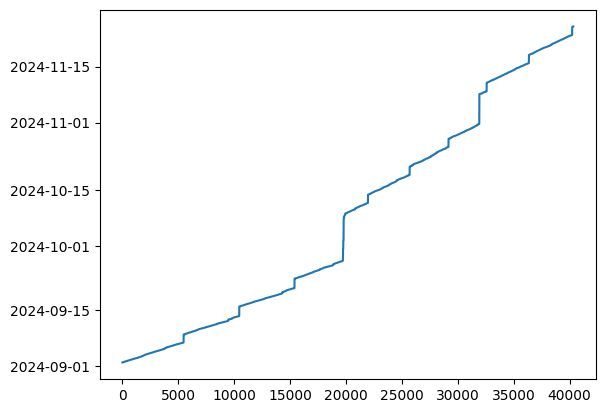


Large time gap found:
    message_timestamp         shift  weekday
0 2024-09-03 10:01:10  Fruehschicht  Tuesday
1 2024-09-27 08:13:47  Fruehschicht   Friday
Time difference: 2067157.0 seconds

Large time gap found:
    message_timestamp         shift weekday
4 2024-09-02 16:11:57  Spaetschicht  Monday
5 2024-11-11 19:47:47  Spaetschicht  Monday
Time difference: 6060950.0 seconds

Large time gap found:
    message_timestamp         shift    weekday
7 2024-09-04 05:43:48  Fruehschicht  Wednesday
8 2024-09-23 08:01:18  Fruehschicht     Monday
Time difference: 1649850.0 seconds

Large time gap found:
    message_timestamp         shift    weekday
8 2024-09-23 08:01:18  Fruehschicht     Monday
9 2024-09-25 15:53:23  Spaetschicht  Wednesday
Time difference: 201125.0 seconds

Large time gap found:
     message_timestamp         shift    weekday
9  2024-09-25 15:53:23  Spaetschicht  Wednesday
10 2024-10-16 20:45:29  Spaetschicht  Wednesday
Time difference: 1831926.0 seconds

Large time gap fo

In [4]:
plt.plot(df["message_timestamp"].sort_values().to_numpy())
plt.show()

# Calculate time differences between consecutive rows
time_diffs = df["message_timestamp"].diff().dt.total_seconds()

# Find indices where time diff > 1000 seconds
large_gaps = time_diffs[time_diffs > 50000].index

# Show rows with large gaps and their previous rows
for idx in large_gaps:
    print("\nLarge time gap found:")
    print(df.iloc[idx - 1 : idx + 1][["message_timestamp", "shift", "weekday"]])
    print(f"Time difference: {time_diffs[idx]:.1f} seconds")


In [5]:
names = []
unique_counts = []
for c in df.columns:
    if "sensor" not in c:
        continue
    sensor_number = int(c.split("_")[1].replace("sensor", ""))
    station_number = int(c.split("_")[0].replace("s", ""))
    names.append((station_number, sensor_number, c))
names.sort()
for c in names:
    col = df[c[2]]
    unique = col.unique()
    print(c)
    print(f"Unique: {len(unique)} | NaN: {col.isna().sum()} | Total: {len(col)}")
    print(unique[:7])
    print()
    unique_counts.append(len(unique))


(0, 0, 's0_sensor0_kilonewton_step3')
Unique: 2 | NaN: 24863 | Total: 40336
[         nan -53.53724329]

(0, 1, 's0_sensor1_millimeter_step1')
Unique: 69 | NaN: 24863 | Total: 40336
[          nan 8530.58497723 8531.24323524 8525.97717116 8525.75775182
 8527.95194519 8530.14613856]

(0, 2, 's0_sensor2_millimeter_step1')
Unique: 4 | NaN: 1247 | Total: 40336
[25178.80726414 26579.1819816             nan 23781.92475295]

(0, 3, 's0_sensor3_kilonewton_step1')
Unique: 2 | NaN: 24863 | Total: 40336
[         nan 765.80468731]

(0, 4, 's0_sensor4_kilonewton_step1')
Unique: 25 | NaN: 1247 | Total: 40336
[60.40624791 60.7808603  60.21894172 60.03163552 60.31259481 60.12528862
 60.59355411]

(0, 5, 's0_sensor5_millimeter_step1')
Unique: 4 | NaN: 1247 | Total: 40336
[26243.57387391 27707.227994              nan 24783.5697641 ]

(0, 6, 's0_sensor6_kilonewton_step3')
Unique: 2 | NaN: 24863 | Total: 40336
[        nan 45.73407548]

(0, 7, 's0_sensor7_kilonewton_step3')
Unique: 3 | NaN: 1247 | Total:

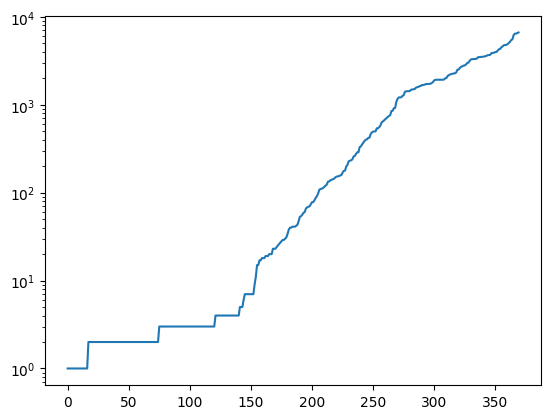

In [6]:
plt.plot(sorted(unique_counts))
plt.yscale("log")
plt.show()


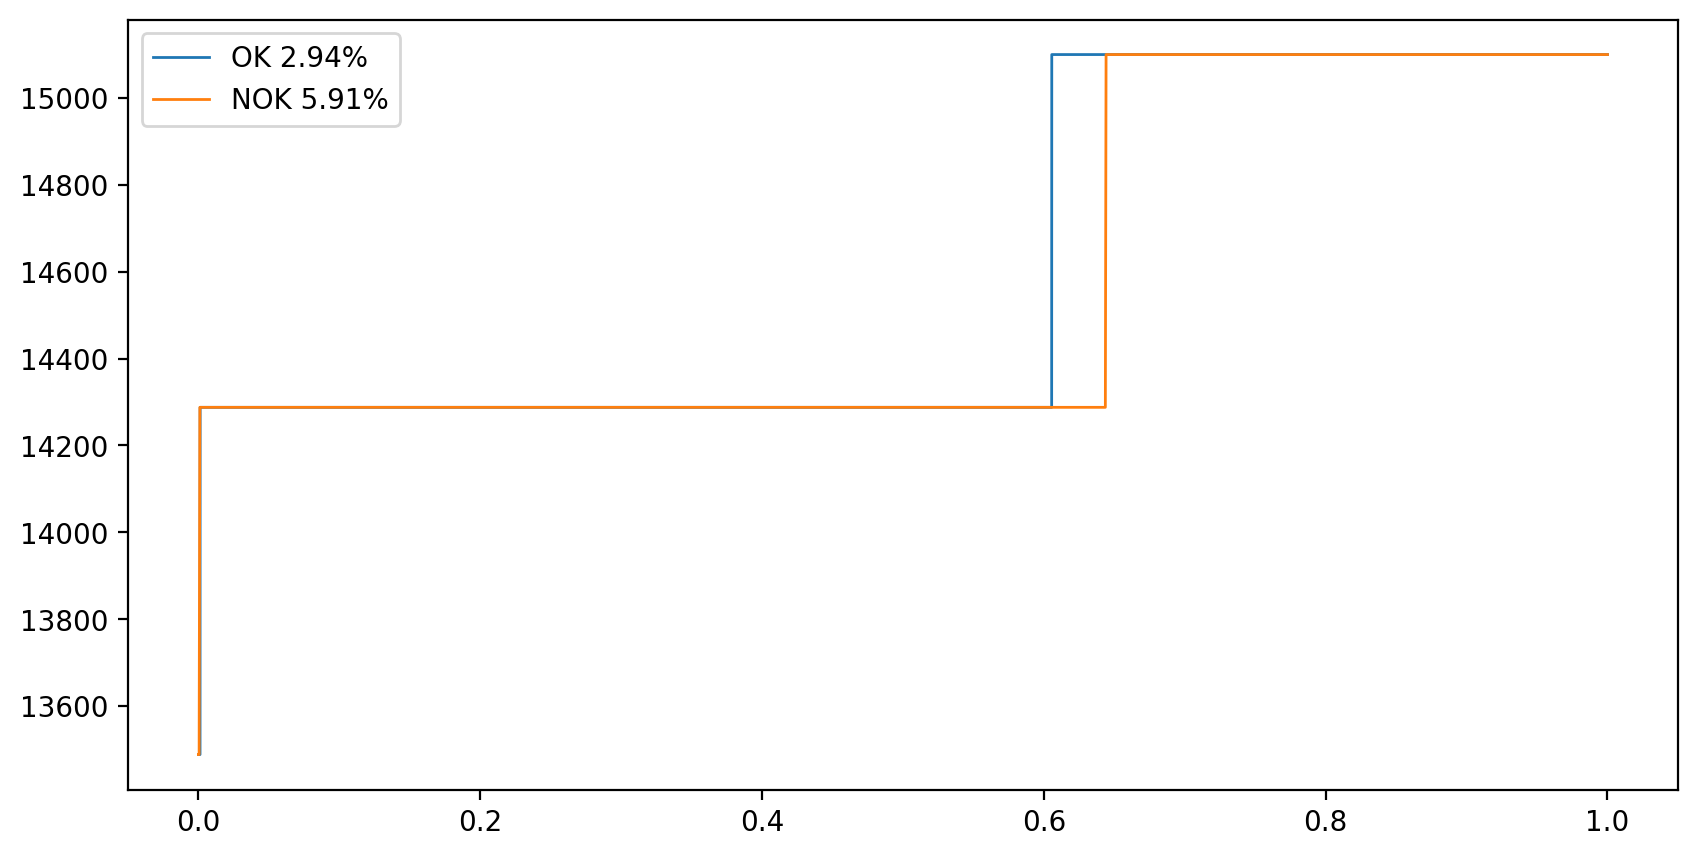

In [8]:
def get_nan_ratios(df: pd.DataFrame):
    values = []
    for x, y, name in names:
        values.append(df[name].isna().sum() / len(df))
    return values


def get_samples(i: int, ok: bool):
    name = names[i][2]
    samples = df[df["label"] == 1 if ok else df["label"] != 1][name]
    nan_ratio = samples.isna().sum() / len(samples)
    filtered = sorted(samples.dropna().tolist())
    return nan_ratio, filtered


def contrast_samples(i: int):
    nan_i, ok_i = get_samples(i, True)
    nan_j, nok_i = get_samples(i, False)
    plt.figure(figsize=(10, 5), dpi=200)
    plt.plot(np.linspace(0, 1, len(ok_i)), ok_i, label=f"OK {nan_i:.2%}", lw=1)
    plt.plot(np.linspace(0, 1, len(nok_i)), nok_i, label=f"NOK {nan_j:.2%}", lw=1)
    plt.legend()
    plt.show()


contrast_samples(10)


In [14]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(len(df))), 
    y=get_nan_ratios(df), 
    mode='lines+markers', 
    name='Line'
))

fig.update_layout(
    title="NaN ratios in data",
    xaxis_title="Column index",
    yaxis_title="NaN ratio",
    template="plotly_white"
)

fig.show()